In [2]:
#WARNINGS
import warnings
warnings.filterwarnings('ignore')

# NUMPY 
import numpy as np

# STATS
import scipy.stats as stats
from scipy.stats import norm, skew

# MATPLOTLIB
import matplotlib as mlp
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

# PANDAS
import pandas as pd 
pd.set_option("display.max_rows", None, "display.max_columns", None) 

# SEABORN
import seaborn as sns

# SCIKIT-LEARN: SELECTION DE VARIABLES

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# SCIKIT-LEARN: PRE-PROCESSING
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # Encodage des variables catégorielles ordinales
from sklearn.preprocessing import LabelBinarizer, OneHotEncoder # Encodage des variables catégorielles nominales
from sklearn.preprocessing import StandardScaler # Normalisation des variables numériques
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer # Imputation
from sklearn.impute import KNNImputer 

# SCIKIT-LEARN: MODELES
from sklearn.linear_model import LogisticRegression

# SCIKIT-LEARN: VALIDATION CROISEE + OPTIMISATION
from sklearn.model_selection import train_test_split # Séparer en données train et test
from sklearn.model_selection import cross_val_score # Validation croisée pour comparison entre modèles
from sklearn.model_selection import validation_curve # Courbe de validation : visulaisr des scores lors du choix d'un hyper-paramètre
from sklearn.model_selection import GridSearchCV # Tester plusieurs hyper-paramètres
from sklearn.model_selection import learning_curve # Courbe d'apprentissage : visualisation des scores du train et du validation sets en fonction des quanitiés des données
 
## EVALUATION
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# SCHIKIT-LEARN: PIPELINE AND TRANSFORMATEURll
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
import importlib
from importlib import reload

In [3]:
# import functions from data_preprocessing.py
import sys
import os

# Ajouter le chemin du dossier parent pour que Python puisse trouver le module 'data'
module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src import data_preprocessing
from data import extract_data
from src import evaluate


In [4]:
data = extract_data.data
df = data.copy()

# Pretraitement

In [5]:
reload(data_preprocessing)

<module 'src.data_preprocessing' from 'c:\\Users\\UTCPRET\\Desktop\\P24\\AI28\\Projet\\ai28-income-prediction\\src\\data_preprocessing.py'>

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:

df = data_preprocessing.preprocess(df)
df.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [8]:
# Méthode 1: Utiliser duplicated() pour identifier les doublons et les compter
duplicate_rows = df.duplicated()
num_duplicates = duplicate_rows.sum()

print(f"\nNombre de doublons: {num_duplicates}")


Nombre de doublons: 48


### Suppression des doublons

In [9]:
df = df.drop_duplicates()
df.shape

(48544, 14)

Suppression de fnlwgt

In [10]:
## suppression du colonne 'fnwlwgt'
df = df.drop(columns=['fnlwgt'])

In [11]:
df_train, df_test = data_preprocessing.seperate_train_test(df, random_state=42)

In [12]:
cat_features = data_preprocessing.get_cat_features(df)
cont_features = data_preprocessing.get_cont_features(df)

In [13]:
df_train = data_preprocessing.impute_missing_cat_values(df_train, cat_features,strategy='most_frequent')
df_test = data_preprocessing.impute_missing_cat_values(df_test, cat_features,strategy='most_frequent')

In [14]:
df_train,df_test = data_preprocessing.standardize(df_train, df_test, cont_features)

In [15]:
df_train,df_test = data_preprocessing.encode_cat_features(df_train, df_test, cat_features)

In [16]:
df_train.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
20628,25,4,12,4,10,3,4,0,0,0,40,39,0
34928,32,6,10,4,12,4,4,0,0,0,7,39,0
18703,73,1,9,6,13,1,4,0,3273,0,40,39,0
26780,42,5,9,0,4,4,4,1,0,0,90,39,1
38471,35,6,9,0,3,3,4,1,0,0,40,39,0


# Modélisation

In [17]:
df_train_select = df_train.drop('>50K', axis=1)
df_test_select = df_test.drop('>50K', axis=1)
target_train = df_train['>50K']
target_test = df_test['>50K']

In [18]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values


## Model 1 : Regression Logistique

In [19]:
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=7) # tol (hyperparametre) est la tolérance pour l'arrêt de l'optimisation , valeur minimale de la fonction de coût
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7) # plus C est bas plus la regularisation est forte.. C est l'inverse de lambda (parametre de régularisation)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7) # l1_ratio est le ratio de la pénalité L1 dans la pénalité L1 + L2


In [20]:
dict_models = {
    "Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
                }

In [21]:
X_train.shape

(38835, 12)

In [22]:
X_test.shape

(9709, 12)

logreg

Matrice de confusion:
[[7026  396]
 [1467  820]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.83      0.95      0.88      7422
           1       0.67      0.36      0.47      2287

    accuracy                           0.81      9709
   macro avg       0.75      0.65      0.68      9709
weighted avg       0.79      0.81      0.79      9709
 

Exactitude: 80.811618 



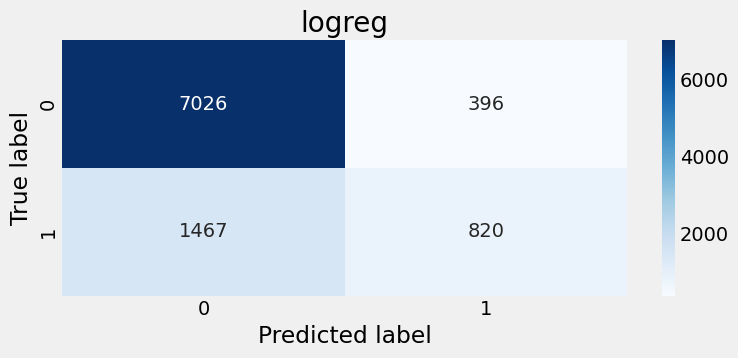

In [23]:
## Régression logistique
# logreg.fit(X_train_up, y_train_up)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "logreg")

Lasso

Matrice de confusion:
[[7000  422]
 [1301  986]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7422
           1       0.70      0.43      0.53      2287

    accuracy                           0.82      9709
   macro avg       0.77      0.69      0.71      9709
weighted avg       0.81      0.82      0.81      9709
 

Exactitude: 82.253579 



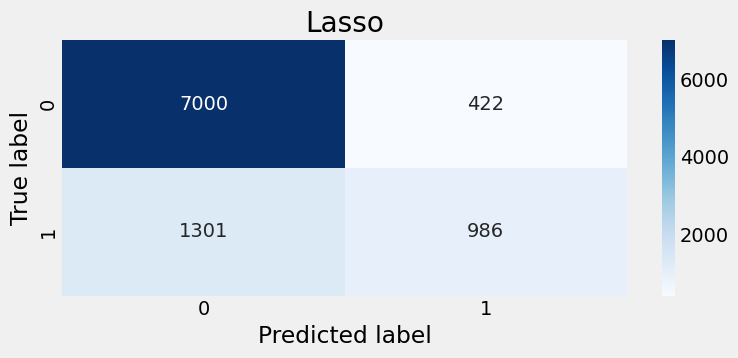

In [24]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred = logregLasso.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "Lasso")





elastic_net

Matrice de confusion:
[[7216  206]
 [1744  543]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7422
           1       0.72      0.24      0.36      2287

    accuracy                           0.80      9709
   macro avg       0.77      0.60      0.62      9709
weighted avg       0.79      0.80      0.76      9709
 

Exactitude: 79.915542 



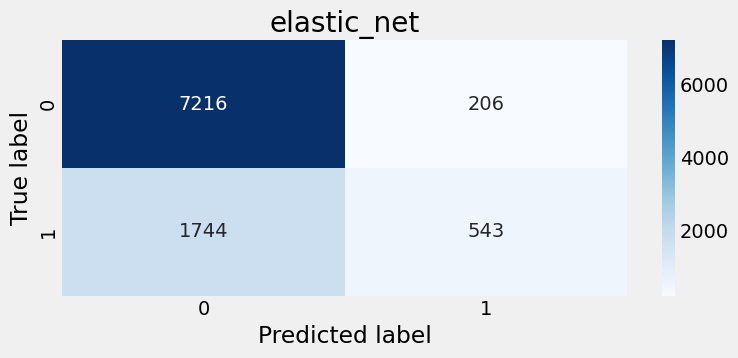

In [25]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred = logregElasticNet.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "elastic_net")



# Modélisation prédictive avec  sur-échantillonnage de la classe minoritaire

In [26]:
!pip install imblearn

In [27]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

Regression Logistique + SMOTE

Matrice de confusion:
[[5434 1988]
 [ 586 1701]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      7422
           1       0.46      0.74      0.57      2287

    accuracy                           0.73      9709
   macro avg       0.68      0.74      0.69      9709
weighted avg       0.80      0.73      0.75      9709
 

Exactitude: 73.488516 



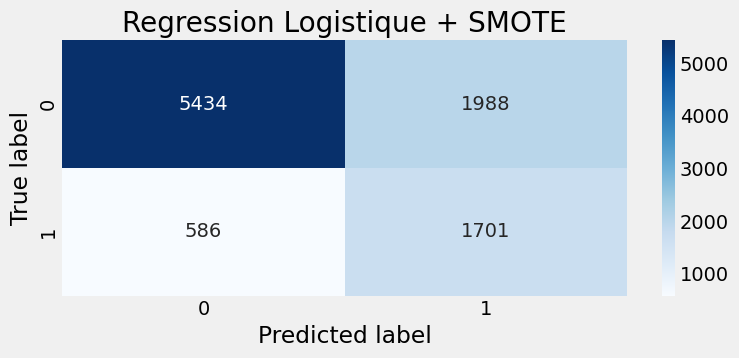

In [28]:
## Régression logistique avec SMOTE
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "Regression Logistique + SMOTE")

Ridge + SMOTE

Matrice de confusion:
[[5419 2003]
 [ 577 1710]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      7422
           1       0.46      0.75      0.57      2287

    accuracy                           0.73      9709
   macro avg       0.68      0.74      0.69      9709
weighted avg       0.80      0.73      0.75      9709
 

Exactitude: 73.426717 



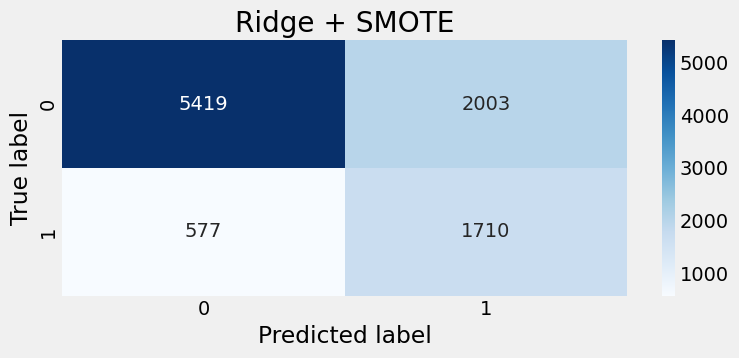

In [29]:
##  ridge + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Ridge + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

In [30]:
logregRidge

LogisticRegression(C=0.1, random_state=7, tol=1e-05)

Lasso + SMOTE

Matrice de confusion:
[[5419 2003]
 [ 577 1710]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      7422
           1       0.46      0.75      0.57      2287

    accuracy                           0.73      9709
   macro avg       0.68      0.74      0.69      9709
weighted avg       0.80      0.73      0.75      9709
 

Exactitude: 73.426717 



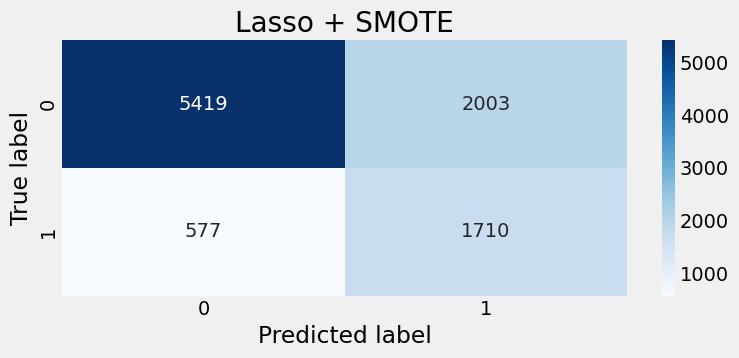

In [31]:
##  ridge + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Lasso + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

En sur-echantillant la classe minoritaire, le rappel augmente

ElasticNet + SMOTE

Matrice de confusion:
[[5419 2003]
 [ 577 1710]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.90      0.73      0.81      7422
           1       0.46      0.75      0.57      2287

    accuracy                           0.73      9709
   macro avg       0.68      0.74      0.69      9709
weighted avg       0.80      0.73      0.75      9709
 

Exactitude: 73.426717 



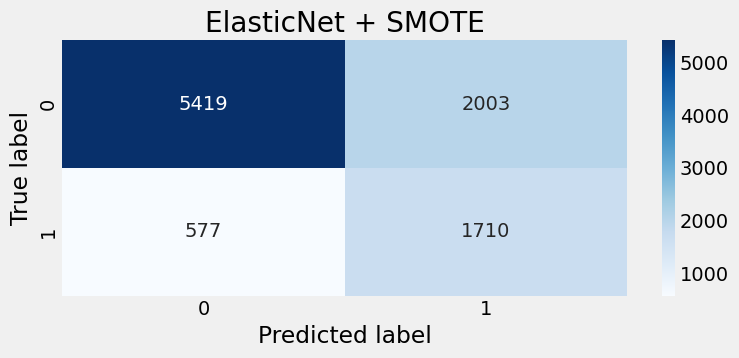

In [32]:
##  ElasticNet + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

## Optimisation des hyper-parametres avec Grid Search

In [33]:
logregLasso

LogisticRegression(C=0.1, penalty='l1', random_state=7, solver='liblinear',
                   tol=1e-05)

In [34]:
param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300, 400]}
grid = GridSearchCV(logregLasso, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
# attention n_jobs=-1 va utiliser tous les CPUs
grid.fit(X_train_up, y_train_up)

GridSearchCV(estimator=LogisticRegression(C=0.1, penalty='l1', random_state=7,
                                          solver='liblinear', tol=1e-05),
             n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'max_iter': [100, 200, 300, 400]},
             return_train_score=True, scoring='f1', verbose=False)

In [35]:
grid.best_params_

{'C': 0.1, 'max_iter': 100}

In [36]:
grid_logreg = grid.best_estimator_
grid_logreg

LogisticRegression(C=0.1, penalty='l1', random_state=7, solver='liblinear',
                   tol=1e-05)

In [37]:
predictions = grid_logreg.fit(X_train, y_train)

In [38]:
grid_logreg.score(X_train, y_train)

0.8245397193253509

In [39]:
grid_logreg.score(X_test, y_test)

0.8225357915336285

ElasticNet + SMOTE

Matrice de confusion:
[[7000  422]
 [1301  986]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7422
           1       0.70      0.43      0.53      2287

    accuracy                           0.82      9709
   macro avg       0.77      0.69      0.71      9709
weighted avg       0.81      0.82      0.81      9709
 

Exactitude: 82.253579 



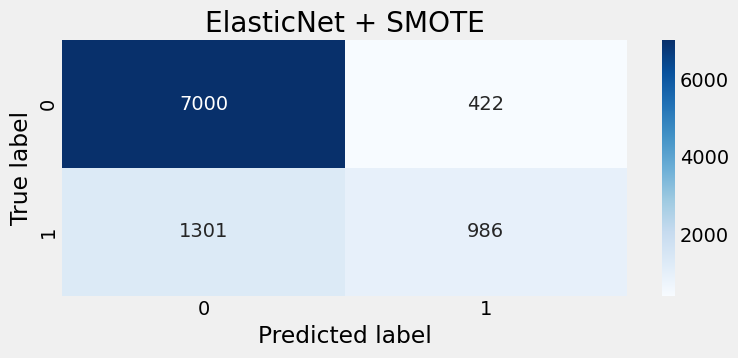

In [40]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg.predict(X_test)

evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

## Courbe de validation

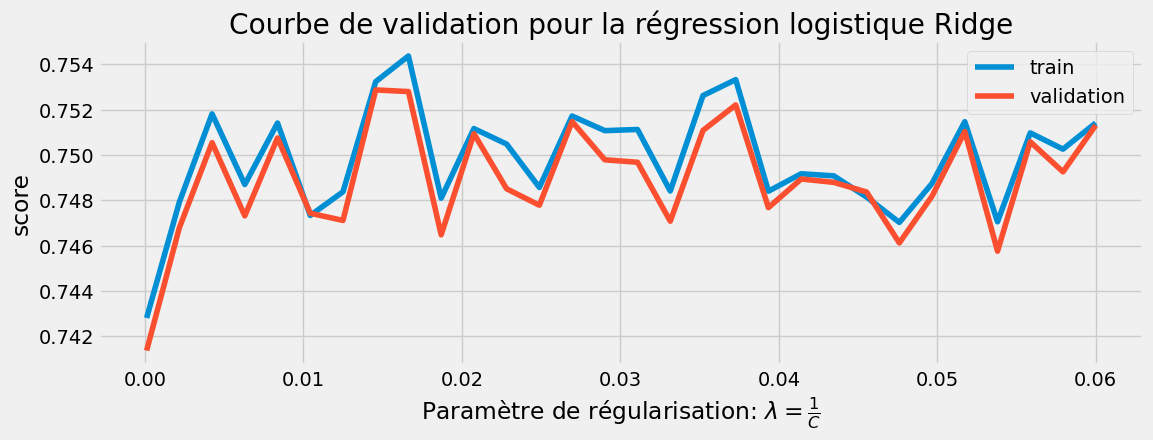

In [41]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregRidge,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Ridge")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

Pour la plupart des valeurs de lambda, le modèle est en sur-apprentissage

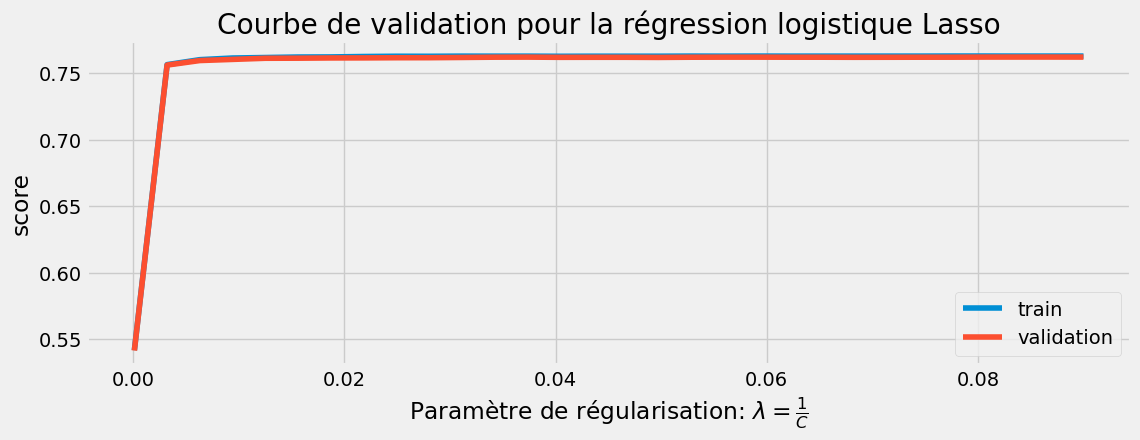

In [42]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.09, 30)

train_score, val_score = validation_curve(logregLasso,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Lasso")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

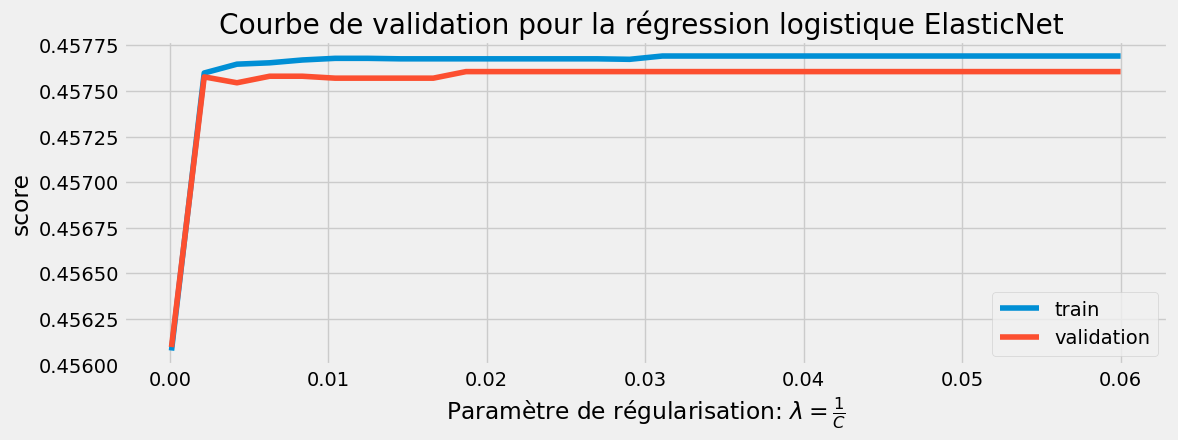

In [43]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregElasticNet,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique ElasticNet ")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

In [44]:
logregElasticNet1 = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.9, tol=10e-6, random_state=7)

In [45]:
list_hyperparams = np.linspace(0.01, 0.07, 30)

train_score, val_score = validation_curve(logregElasticNet1, 
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Elastic Net 1")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

KeyboardInterrupt: 

## Courbe d'apprentissage

Text(0.5, 1.0, "Courbe d'apprentissage pour la régression logistique Lasso")

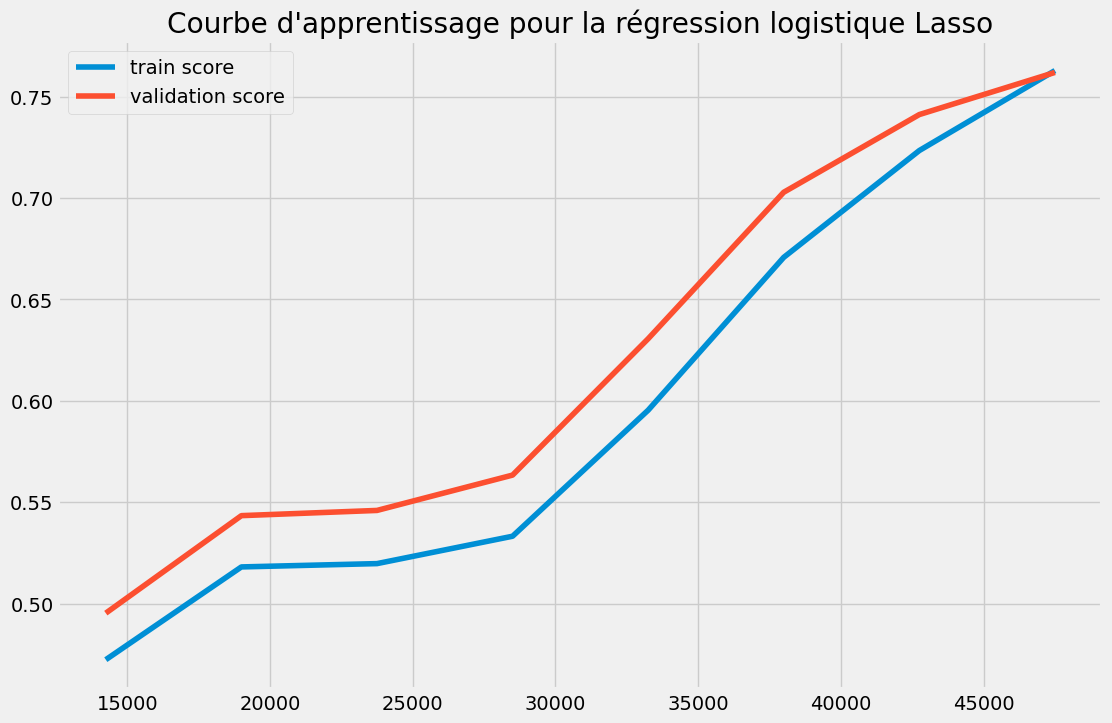

In [ ]:
N, train_score, val_score = learning_curve(logregLasso, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe d'apprentissage pour la régression logistique Lasso")

Text(0.5, 1.0, "Courbe d'apprentissage pour la régression logistique Ridge")

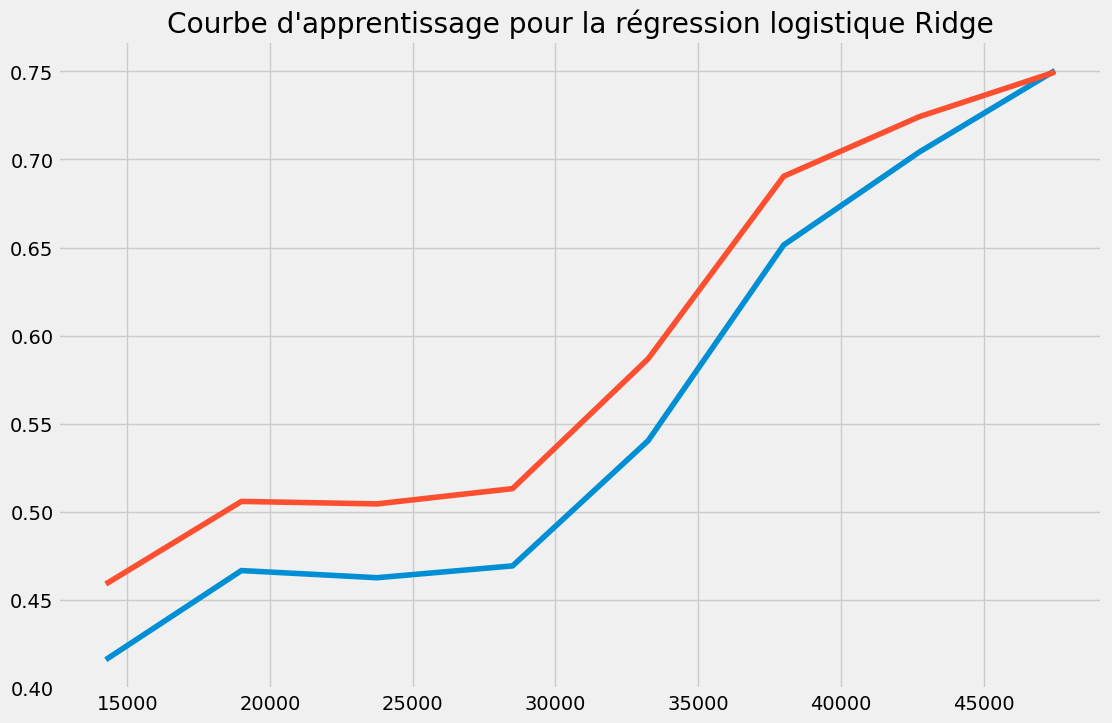

In [ ]:
N, train_score, val_score = learning_curve(logregRidge, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title("Courbe d'apprentissage pour la régression logistique Ridge")

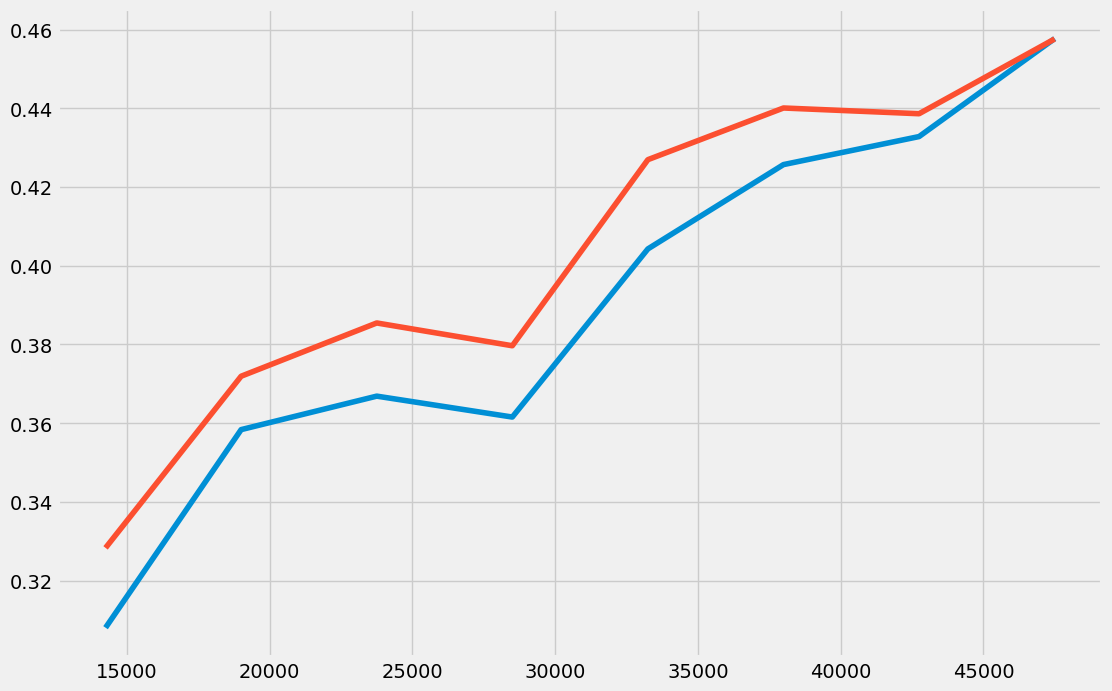

In [ ]:
N, train_score, val_score = learning_curve(logregElasticNet1, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title("Courbe d'apprentissage pour la régression logistique Elastic Net 1")

## Pipeline

In [53]:
# Imputation et Normalisation
catgoricalPipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
    )

continuousPipeline = make_pipeline(
    #SimpleImputer(strategy="median"),
    # KNNImputer(n_neighbors=3),
    StandardScaler(),
    # MinMaxScaler(),
    # SimpleImputer(strategy="constant"), # constante 0
    
)

preprocessor = make_column_transformer(
    (catgoricalPipeline, cat_features),
    (continuousPipeline, cont_features),
)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                ('pipeline-2',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 Index([], dtype='object'))])

In [57]:
# Modélisation
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

logregLasso = LogisticRegression(
    C=50, 
    penalty='l1', 
    solver='saga', 
    tol=10e-6, 
    random_state=7)


# Créer le pipeline avec SMOTE et le préprocesseur
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    ('selectkbest', SelectKBest(score_func=chi2, k=10)),
    ('smote', SMOTE(random_state=7)),
    ('classifier', logregLasso)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('selectkbest',
                 SelectKBest(score_func=<function chi2 at 0x00000242F2A356C0>)),
                ('smote', SMOTE(random_state=7)),
                ('classifier',
                 LogisticRegression(C=50, penalty='l1', random_state=7,
                                    solver='saga', tol=1e-05))])

In [55]:
# Séparation des données en variables explicatives X et target y
X = df.drop(columns=['>50K'])  # Assurez-vous que 'class' est le nom correct
y = df['>50K']

# Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
# Entraînement du modèle
pipeline.fit(X_train, y_train)

# Prédiction sur les données de test
y_pred = pipeline.predict(X_test)

# Evaluation du modèle
print(f"Accuracy : {accuracy_score(y_test, y_pred)}")

Accuracy : 0.7128437532186631


Lasso (pipeline 1)

Matrice de confusion:
[[4897 2536]
 [ 252 2024]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.95      0.66      0.78      7433
           1       0.44      0.89      0.59      2276

    accuracy                           0.71      9709
   macro avg       0.70      0.77      0.69      9709
weighted avg       0.83      0.71      0.73      9709
 

Exactitude: 71.284375 



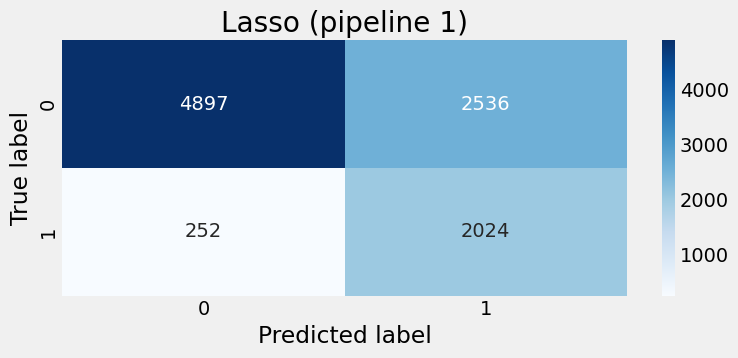

In [58]:
## régression logistique + elasticnet
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Lasso (pipeline 1)') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'